In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")
print("Ready to explore Simpson's Paradox")

Libraries imported successfully!
Ready to explore Simpson's Paradox


# Create Dummy Data - Medical Treatment Scenario
# Scenario: Two hospitals treating kidney stones with different methods

In [ ]:

# Hospital A (Small stones specialty)
hospital_a = pd.DataFrame({
    'Hospital': ['Hospital A'] * 350,
    'Treatment': ['Treatment A'] * 87 + ['Treatment B'] * 263,
    'Stone_Size': ['Small'] * 350,
    'Success': (
        [1] * 81 + [0] * 6 +  # Treatment A: 81/87 = 93% success
        [1] * 234 + [0] * 29  # Treatment B: 234/263 = 89% success
    )
})

# Hospital B (Large stones specialty)
hospital_b = pd.DataFrame({
    'Hospital': ['Hospital B'] * 350,
    'Treatment': ['Treatment A'] * 263 + ['Treatment B'] * 87,
    'Stone_Size': ['Large'] * 350,
    'Success': (
        [1] * 192 + [0] * 71 +  # Treatment A: 192/263 = 73% success
        [1] * 55 + [0] * 32     # Treatment B: 55/87 = 63% success
    )
})

# Combine data
data = pd.concat([hospital_a, hospital_b], ignore_index=True)

# Calculate success rates
print("="*60)
print("🏥 MEDICAL TREATMENT DATA CREATED")
print("="*60)
print("\n📊 Overall Success Rates (Combined):")
overall = data.groupby('Treatment')['Success'].agg(['sum', 'count', 'mean'])
overall['percentage'] = (overall['mean'] * 100).round(1)
print(f"\nTreatment A: {overall.loc['Treatment A', 'sum']:.0f}/{overall.loc['Treatment A', 'count']:.0f} = {overall.loc['Treatment A', 'percentage']:.1f}% ✨")
print(f"Treatment B: {overall.loc['Treatment B', 'sum']:.0f}/{overall.loc['Treatment B', 'count']:.0f} = {overall.loc['Treatment B', 'percentage']:.1f}% ⭐")

print("\n" + "="*60)
print("🔍 Success Rates by Stone Size:")
print("="*60)
for stone_size in ['Small', 'Large']:
    print(f"\n{stone_size} Stones:")
    subset = data[data['Stone_Size'] == stone_size]
    for treatment in ['Treatment A', 'Treatment B']:
        treatment_data = subset[subset['Treatment'] == treatment]
        success_rate = treatment_data['Success'].mean() * 100
        total = len(treatment_data)
        successes = treatment_data['Success'].sum()
        print(f"  {treatment}: {successes:.0f}/{total:.0f} = {success_rate:.1f}%")

print("\n" + "="*60)
print(" SIMPSON'S PARADOX DETECTED!")
print("="*60)
print("Treatment B appears better overall,")
print("but Treatment A is better for BOTH stone sizes!")
print("="*60)

🏥 MEDICAL TREATMENT DATA CREATED

📊 Overall Success Rates (Combined):

Treatment A: 273/350 = 78.0% ✨
Treatment B: 289/350 = 82.6% ⭐

🔍 Success Rates by Stone Size:

Small Stones:
  Treatment A: 81/87 = 93.1%
  Treatment B: 234/263 = 89.0%

Large Stones:
  Treatment A: 192/263 = 73.0%
  Treatment B: 55/87 = 63.2%

⚠️  SIMPSON'S PARADOX DETECTED!
Treatment B appears better overall,
but Treatment A is better for BOTH stone sizes!


# Visualize Simpson's Paradox


📈 Visualization created successfully!
💾 Saved as 'simpsons_paradox.png'


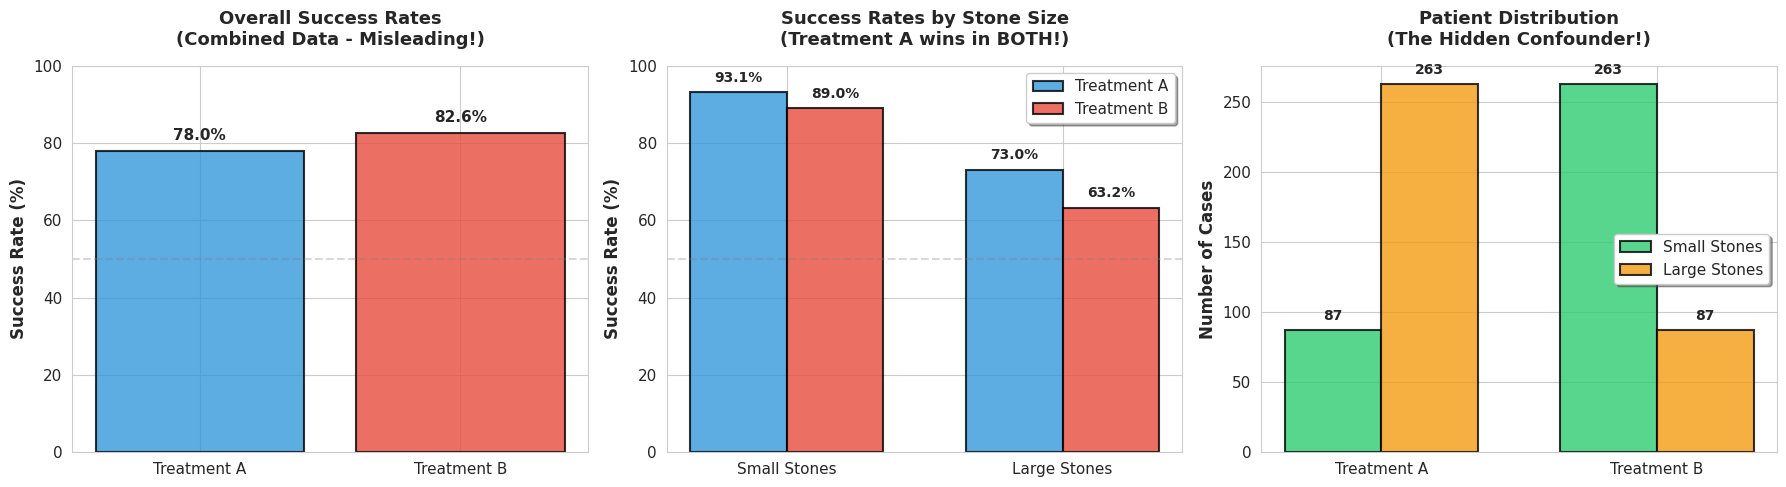


🎯 KEY INSIGHT:
Treatment A handled mostly SMALL stones (easy cases)
Treatment B handled mostly LARGE stones (hard cases)
This imbalance creates the paradox!


In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Color scheme
colors = {'Treatment A': '#3498db', 'Treatment B': '#e74c3c'}
stone_colors = {'Small': '#2ecc71', 'Large': '#f39c12'}

# Chart 1: Overall Success Rates (Misleading!)
ax1 = axes[0]
overall_stats = data.groupby('Treatment')['Success'].agg(['sum', 'count'])
overall_stats['rate'] = (overall_stats['sum'] / overall_stats['count'] * 100)

bars1 = ax1.bar(overall_stats.index, overall_stats['rate'],
                color=[colors[t] for t in overall_stats.index],
                alpha=0.8, edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Overall Success Rates\n(Combined Data - Misleading!)',
              fontsize=13, fontweight='bold', pad=15)
ax1.set_ylim(0, 100)
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# Chart 2: Success Rates by Stone Size
ax2 = axes[1]
stone_stats = data.groupby(['Stone_Size', 'Treatment'])['Success'].agg(['sum', 'count'])
stone_stats['rate'] = (stone_stats['sum'] / stone_stats['count'] * 100)

x = np.arange(len(['Small', 'Large']))
width = 0.35

small_rates = [stone_stats.loc[('Small', 'Treatment A'), 'rate'],
               stone_stats.loc[('Small', 'Treatment B'), 'rate']]
large_rates = [stone_stats.loc[('Large', 'Treatment A'), 'rate'],
               stone_stats.loc[('Large', 'Treatment B'), 'rate']]

bars2_1 = ax2.bar(x - width/2, [small_rates[0], large_rates[0]], width,
                   label='Treatment A', color=colors['Treatment A'],
                   alpha=0.8, edgecolor='black', linewidth=1.5)
bars2_2 = ax2.bar(x + width/2, [small_rates[1], large_rates[1]], width,
                   label='Treatment B', color=colors['Treatment B'],
                   alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Success Rates by Stone Size\n(Treatment A wins in BOTH!)',
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(['Small Stones', 'Large Stones'])
ax2.legend(frameon=True, shadow=True)
ax2.set_ylim(0, 100)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.3)

# Add value labels
for bars in [bars2_1, bars2_2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{height:.1f}%', ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

# Chart 3: Sample Distribution (The Confounder!)
ax3 = axes[2]
distribution = data.groupby(['Treatment', 'Stone_Size']).size().unstack()

x = np.arange(len(['Treatment A', 'Treatment B']))
bars3_1 = ax3.bar(x - width/2, distribution['Small'], width,
                   label='Small Stones', color=stone_colors['Small'],
                   alpha=0.8, edgecolor='black', linewidth=1.5)
bars3_2 = ax3.bar(x + width/2, distribution['Large'], width,
                   label='Large Stones', color=stone_colors['Large'],
                   alpha=0.8, edgecolor='black', linewidth=1.5)

ax3.set_ylabel('Number of Cases', fontsize=12, fontweight='bold')
ax3.set_title('Patient Distribution\n(The Hidden Confounder!)',
              fontsize=13, fontweight='bold', pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels(['Treatment A', 'Treatment B'])
ax3.legend(frameon=True, shadow=True)

# Add value labels
for bars in [bars3_1, bars3_2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('simpsons_paradox.png', dpi=300, bbox_inches='tight')
print("\n📈 Visualization created successfully!")
print("💾 Saved as 'simpsons_paradox.png'")
plt.show()

print("\n" + "="*60)
print("KEY INSIGHT:")
print("="*60)
print("Treatment A handled mostly SMALL stones (easy cases)")
print("Treatment B handled mostly LARGE stones (hard cases)")
print("This imbalance creates the paradox!")
print("="*60)

# Interactive Simpson's Paradox - University Admissions
# Scenario: Two departments admitting students by gender

In [ ]:
print("="*70)
print("🎓 INTERACTIVE SIMPSON'S PARADOX: UNIVERSITY ADMISSIONS")
print("="*70)
print("\nScenario: A university has two departments (Computer Science & Biology)")
print("We'll examine admission rates by gender to see if there's bias.\n")
print("="*70)
print("\n📝 Enter the admission statistics below:")
print("   (Press Enter to use default realistic values)\n")

def get_input(prompt, default):
    """Helper function to get user input with default value"""
    user_input = input(f"{prompt} [Default: {default}]: ").strip()
    return default if user_input == "" else int(user_input)

# Computer Science Department (Competitive - Low acceptance rate)
print("\n🖥️  COMPUTER SCIENCE DEPARTMENT (Highly Competitive):")
print("-" * 70)

cs_male_applied = get_input("  Male applicants", 800)
cs_male_admitted = get_input("  Male admitted", 480)

cs_female_applied = get_input("  Female applicants", 200)
cs_female_admitted = get_input("  Female admitted", 120)

# Biology Department (Less competitive - High acceptance rate)
print("\n🧬 BIOLOGY DEPARTMENT (Less Competitive):")
print("-" * 70)

bio_male_applied = get_input("  Male applicants", 200)
bio_male_admitted = get_input("  Male admitted", 140)

bio_female_applied = get_input("  Female applicants", 800)
bio_female_admitted = get_input("  Female admitted", 560)

# Create DataFrame
admissions_data = pd.DataFrame({
    'Department': ['Computer Science'] * 2 + ['Biology'] * 2,
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Applied': [cs_male_applied, cs_female_applied, bio_male_applied, bio_female_applied],
    'Admitted': [cs_male_admitted, cs_female_admitted, bio_male_admitted, bio_female_admitted]
})

admissions_data['Admission_Rate'] = (admissions_data['Admitted'] / admissions_data['Applied'] * 100)

# Calculate overall rates
total_male_applied = cs_male_applied + bio_male_applied
total_male_admitted = cs_male_admitted + bio_male_admitted
total_female_applied = cs_female_applied + bio_female_applied
total_female_admitted = cs_female_admitted + bio_female_admitted

male_overall_rate = (total_male_admitted / total_male_applied * 100)
female_overall_rate = (total_female_admitted / total_female_applied * 100)

# Display results
print("\n" + "="*70)
print("📊 RESULTS:")
print("="*70)

print("\n🎯 OVERALL ADMISSION RATES:")
print(f"  Male:   {total_male_admitted}/{total_male_applied} = {male_overall_rate:.1f}%")
print(f"  Female: {total_female_admitted}/{total_female_applied} = {female_overall_rate:.1f}%")

if abs(male_overall_rate - female_overall_rate) < 1:
    print("  ➡️  Very similar overall rates!")
elif male_overall_rate > female_overall_rate:
    print(f"  ➡️  Males have {male_overall_rate - female_overall_rate:.1f}% higher rate overall")
else:
    print(f"  ➡️  Females have {female_overall_rate - male_overall_rate:.1f}% higher rate overall")

print("\n🔍 DEPARTMENT-WISE ADMISSION RATES:")
for dept in ['Computer Science', 'Biology']:
    print(f"\n  {dept}:")
    dept_data = admissions_data[admissions_data['Department'] == dept]
    for _, row in dept_data.iterrows():
        print(f"    {row['Gender']:7s}: {row['Admitted']:.0f}/{row['Applied']:.0f} = {row['Admission_Rate']:.1f}%")

    male_rate = dept_data[dept_data['Gender'] == 'Male']['Admission_Rate'].values[0]
    female_rate = dept_data[dept_data['Gender'] == 'Female']['Admission_Rate'].values[0]

    if abs(male_rate - female_rate) < 1:
        print(f"    ➡️  Similar rates in {dept}")
    elif female_rate > male_rate:
        print(f"    ➡️  Females have {female_rate - male_rate:.1f}% higher rate")
    else:
        print(f"    ➡️  Males have {male_rate - female_rate:.1f}% higher rate")

# Check for Simpson's Paradox
cs_data = admissions_data[admissions_data['Department'] == 'Computer Science']
bio_data = admissions_data[admissions_data['Department'] == 'Biology']

cs_female_better = (cs_data[cs_data['Gender'] == 'Female']['Admission_Rate'].values[0] >
                    cs_data[cs_data['Gender'] == 'Male']['Admission_Rate'].values[0])
bio_female_better = (bio_data[bio_data['Gender'] == 'Female']['Admission_Rate'].values[0] >
                     bio_data[bio_data['Gender'] == 'Male']['Admission_Rate'].values[0])
overall_male_better = male_overall_rate > female_overall_rate

paradox_detected = ((cs_female_better and bio_female_better and overall_male_better) or
                   (not cs_female_better and not bio_female_better and not overall_male_better))

print("\n" + "="*70)
if paradox_detected:
    print("⚠️  SIMPSON'S PARADOX DETECTED!")
    print("="*70)
    print("One gender has better rates in BOTH departments,")
    print("but the OPPOSITE gender has a better overall rate!")
else:
    print("✅ NO PARADOX DETECTED")
    print("="*70)
    print("The trends are consistent across departments and overall.")
print("="*70)

# Store for next cell
globals()['admissions_data'] = admissions_data
globals()['male_overall_rate'] = male_overall_rate
globals()['female_overall_rate'] = female_overall_rate

🎓 INTERACTIVE SIMPSON'S PARADOX: UNIVERSITY ADMISSIONS

Scenario: A university has two departments (Computer Science & Biology)
We'll examine admission rates by gender to see if there's bias.


📝 Enter the admission statistics below:
   (Press Enter to use default realistic values)


🖥️  COMPUTER SCIENCE DEPARTMENT (Highly Competitive):
----------------------------------------------------------------------
  Male applicants [Default: 800]: 800
  Male admitted [Default: 480]: 450
  Female applicants [Default: 200]: 190
  Female admitted [Default: 120]: 100

🧬 BIOLOGY DEPARTMENT (Less Competitive):
----------------------------------------------------------------------
  Male applicants [Default: 200]: 160
  Male admitted [Default: 140]: 100
  Female applicants [Default: 800]: 800
  Female admitted [Default: 560]: 500

📊 RESULTS:

🎯 OVERALL ADMISSION RATES:
  Male:   550/960 = 57.3%
  Female: 600/990 = 60.6%
  ➡️  Females have 3.3% higher rate overall

🔍 DEPARTMENT-WISE ADMISSION RATES:



# Visualize Interactive Results


📈 Interactive visualization created successfully!
💾 Saved as 'interactive_simpsons_paradox.png'


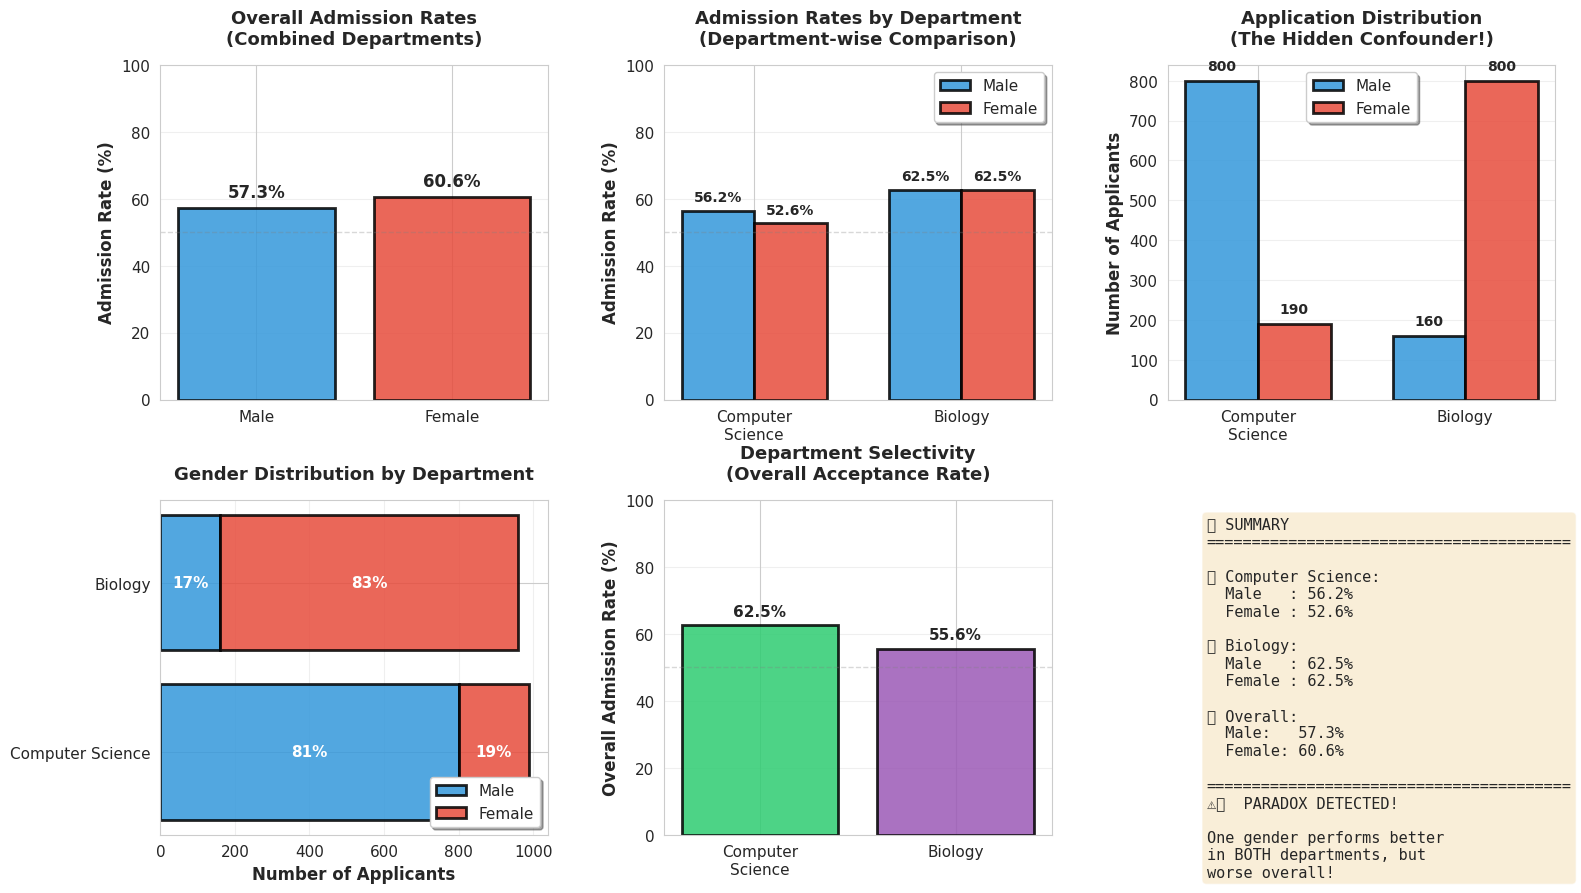


🎯 WHY DOES THIS HAPPEN?


In [ ]:

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Color scheme
gender_colors = {'Male': '#3498db', 'Female': '#e74c3c'}
dept_colors = {'Computer Science': '#9b59b6', 'Biology': '#2ecc71'}

# Chart 1: Overall Admission Rates
ax1 = fig.add_subplot(gs[0, 0])
overall_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Rate': [male_overall_rate, female_overall_rate]
})

bars1 = ax1.bar(overall_data['Gender'], overall_data['Rate'],
                color=[gender_colors[g] for g in overall_data['Gender']],
                alpha=0.85, edgecolor='black', linewidth=2)

ax1.set_ylabel('Admission Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Overall Admission Rates\n(Combined Departments)',
              fontsize=13, fontweight='bold', pad=15)
ax1.set_ylim(0, 100)
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.3, linewidth=1)
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

# Chart 2: Admission Rates by Department
ax2 = fig.add_subplot(gs[0, 1])
x = np.arange(len(['Computer Science', 'Biology']))
width = 0.35

male_rates = [
    admissions_data[(admissions_data['Department'] == 'Computer Science') &
                   (admissions_data['Gender'] == 'Male')]['Admission_Rate'].values[0],
    admissions_data[(admissions_data['Department'] == 'Biology') &
                   (admissions_data['Gender'] == 'Male')]['Admission_Rate'].values[0]
]

female_rates = [
    admissions_data[(admissions_data['Department'] == 'Computer Science') &
                   (admissions_data['Gender'] == 'Female')]['Admission_Rate'].values[0],
    admissions_data[(admissions_data['Department'] == 'Biology') &
                   (admissions_data['Gender'] == 'Female')]['Admission_Rate'].values[0]
]

bars2_1 = ax2.bar(x - width/2, male_rates, width, label='Male',
                   color=gender_colors['Male'], alpha=0.85,
                   edgecolor='black', linewidth=2)
bars2_2 = ax2.bar(x + width/2, female_rates, width, label='Female',
                   color=gender_colors['Female'], alpha=0.85,
                   edgecolor='black', linewidth=2)

ax2.set_ylabel('Admission Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Admission Rates by Department\n(Department-wise Comparison)',
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(['Computer\nScience', 'Biology'])
ax2.legend(frameon=True, shadow=True, fontsize=11)
ax2.set_ylim(0, 100)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.3, linewidth=1)
ax2.grid(axis='y', alpha=0.3)

for bars in [bars2_1, bars2_2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{height:.1f}%', ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

# Chart 3: Application Distribution (The Confounder!)
ax3 = fig.add_subplot(gs[0, 2])
male_apps = [
    admissions_data[(admissions_data['Department'] == 'Computer Science') &
                   (admissions_data['Gender'] == 'Male')]['Applied'].values[0],
    admissions_data[(admissions_data['Department'] == 'Biology') &
                   (admissions_data['Gender'] == 'Male')]['Applied'].values[0]
]

female_apps = [
    admissions_data[(admissions_data['Department'] == 'Computer Science') &
                   (admissions_data['Gender'] == 'Female')]['Applied'].values[0],
    admissions_data[(admissions_data['Department'] == 'Biology') &
                   (admissions_data['Gender'] == 'Female')]['Applied'].values[0]
]

bars3_1 = ax3.bar(x - width/2, male_apps, width, label='Male',
                   color=gender_colors['Male'], alpha=0.85,
                   edgecolor='black', linewidth=2)
bars3_2 = ax3.bar(x + width/2, female_apps, width, label='Female',
                   color=gender_colors['Female'], alpha=0.85,
                   edgecolor='black', linewidth=2)

ax3.set_ylabel('Number of Applicants', fontsize=12, fontweight='bold')
ax3.set_title('Application Distribution\n(The Hidden Confounder!)',
              fontsize=13, fontweight='bold', pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels(['Computer\nScience', 'Biology'])
ax3.legend(frameon=True, shadow=True, fontsize=11)
ax3.grid(axis='y', alpha=0.3)

for bars in [bars3_1, bars3_2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 20,
                 f'{int(height)}', ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

# Chart 4: Stacked Bar - Gender Distribution
ax4 = fig.add_subplot(gs[1, 0])
dept_order = ['Computer Science', 'Biology']
male_dist = [male_apps[0], male_apps[1]]
female_dist = [female_apps[0], female_apps[1]]

p1 = ax4.barh(dept_order, male_dist, color=gender_colors['Male'],
              alpha=0.85, edgecolor='black', linewidth=2, label='Male')
p2 = ax4.barh(dept_order, female_dist, left=male_dist,
              color=gender_colors['Female'], alpha=0.85,
              edgecolor='black', linewidth=2, label='Female')

ax4.set_xlabel('Number of Applicants', fontsize=12, fontweight='bold')
ax4.set_title('Gender Distribution by Department',
              fontsize=13, fontweight='bold', pad=15)
ax4.legend(frameon=True, shadow=True, fontsize=11, loc='lower right')
ax4.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (m, f) in enumerate(zip(male_dist, female_dist)):
    total = m + f
    male_pct = m / total * 100
    female_pct = f / total * 100
    ax4.text(m/2, i, f'{male_pct:.0f}%', ha='center', va='center',
             fontsize=11, fontweight='bold', color='white')
    ax4.text(m + f/2, i, f'{female_pct:.0f}%', ha='center', va='center',
             fontsize=11, fontweight='bold', color='white')

# Chart 5: Department Selectivity
ax5 = fig.add_subplot(gs[1, 1])
dept_selectivity = admissions_data.groupby('Department').agg({
    'Applied': 'sum',
    'Admitted': 'sum'
})
dept_selectivity['Rate'] = (dept_selectivity['Admitted'] / dept_selectivity['Applied'] * 100)

bars5 = ax5.bar(dept_selectivity.index, dept_selectivity['Rate'],
                color=[dept_colors[d] for d in dept_selectivity.index],
                alpha=0.85, edgecolor='black', linewidth=2)

ax5.set_ylabel('Overall Admission Rate (%)', fontsize=12, fontweight='bold')
ax5.set_title('Department Selectivity\n(Overall Acceptance Rate)',
              fontsize=13, fontweight='bold', pad=15)
ax5.set_ylim(0, 100)
ax5.axhline(y=50, color='gray', linestyle='--', alpha=0.3, linewidth=1)
ax5.grid(axis='y', alpha=0.3)
ax5.set_xticklabels(['Computer\nScience', 'Biology'])

for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# Chart 6: Summary Table
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')

# Create summary text
summary_text = "📋 SUMMARY\n" + "="*40 + "\n\n"

for dept in ['Computer Science', 'Biology']:
    summary_text += f"🎓 {dept}:\n"
    dept_data = admissions_data[admissions_data['Department'] == dept]
    for _, row in dept_data.iterrows():
        summary_text += f"  {row['Gender']:7s}: {row['Admission_Rate']:.1f}%\n"
    summary_text += "\n"

summary_text += "📊 Overall:\n"
summary_text += f"  Male:   {male_overall_rate:.1f}%\n"
summary_text += f"  Female: {female_overall_rate:.1f}%\n\n"

summary_text += "="*40 + "\n"

# Check for paradox again
cs_data = admissions_data[admissions_data['Department'] == 'Computer Science']
bio_data = admissions_data[admissions_data['Department'] == 'Biology']

cs_female_better = (cs_data[cs_data['Gender'] == 'Female']['Admission_Rate'].values[0] >
                    cs_data[cs_data['Gender'] == 'Male']['Admission_Rate'].values[0])
bio_female_better = (bio_data[bio_data['Gender'] == 'Female']['Admission_Rate'].values[0] >
                     bio_data[bio_data['Gender'] == 'Male']['Admission_Rate'].values[0])
overall_male_better = male_overall_rate > female_overall_rate

paradox_detected = ((cs_female_better and bio_female_better and overall_male_better) or
                   (not cs_female_better and not bio_female_better and not overall_male_better))

if paradox_detected:
    summary_text += "⚠️  PARADOX DETECTED!\n"
    summary_text += "\nOne gender performs better\nin BOTH departments, but\nworse overall!"
else:
    summary_text += "✅ No Paradox\n"
    summary_text += "\nTrends are consistent\nacross all levels."

ax6.text(0.1, 0.95, summary_text, transform=ax6.transAxes,
         fontsize=11, verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.savefig('interactive_simpsons_paradox.png', dpi=300, bbox_inches='tight')
print("\n📈 Interactive visualization created successfully!")
print("💾 Saved as 'interactive_simpsons_paradox.png'")
plt.show()

# Explanation
print("\n" + "="*70)
print("🎯 WHY DOES THIS HAPPEN?")

# Experiment with Your Own Numbers!
# Create your own Simpson's Paradox scenario

In [ ]:
print("="*70)
print("🧪 EXPERIMENT: CREATE YOUR OWN SIMPSON'S PARADOX")
print("="*70)
print("\nLet's create a simple scenario with two groups and two categories.")
print("Try to create a paradox where one option is better in both categories")
print("but worse overall!\n")
print("="*70)

def create_custom_paradox():
    """Interactive function to create custom Simpson's Paradox"""

    print("\n📝 SCENARIO: Comparing two teaching methods (Online vs In-Person)")
    print("   across two class types (Morning vs Evening classes)\n")

    # Category 1: Morning Classes
    print("🌅 MORNING CLASSES (typically higher performing):")
    print("-" * 70)

    morning_online_total = get_input("  Online class students", 100)
    morning_online_passed = get_input("  Online students who passed", 85)

    morning_inperson_total = get_input("  In-Person class students", 900)
    morning_inperson_passed = get_input("  In-Person students who passed", 765)

    # Category 2: Evening Classes
    print("\n🌙 EVENING CLASSES (typically lower performing):")
    print("-" * 70)

    evening_online_total = get_input("  Online class students", 900)
    evening_online_passed = get_input("  Online students who passed", 630)

    evening_inperson_total = get_input("  In-Person class students", 100)
    evening_inperson_passed = get_input("  In-Person students who passed", 70)

    # Calculate rates
    morning_online_rate = (morning_online_passed / morning_online_total * 100) if morning_online_total > 0 else 0
    morning_inperson_rate = (morning_inperson_passed / morning_inperson_total * 100) if morning_inperson_total > 0 else 0
    evening_online_rate = (evening_online_passed / evening_online_total * 100) if evening_online_total > 0 else 0
    evening_inperson_rate = (evening_inperson_passed / evening_inperson_total * 100) if evening_inperson_total > 0 else 0

    # Overall rates
    total_online_students = morning_online_total + evening_online_total
    total_online_passed = morning_online_passed + evening_online_passed
    total_inperson_students = morning_inperson_total + evening_inperson_total
    total_inperson_passed = morning_inperson_passed + evening_inperson_passed

    online_overall_rate = (total_online_passed / total_online_students * 100) if total_online_students > 0 else 0
    inperson_overall_rate = (total_inperson_passed / total_inperson_students * 100) if total_inperson_students > 0 else 0

    # Display results
    print("\n" + "="*70)
    print("📊 YOUR RESULTS:")
    print("="*70)

    print("\n🎯 OVERALL PASS RATES:")
    print(f"  Online:    {total_online_passed:.0f}/{total_online_students:.0f} = {online_overall_rate:.1f}%")
    print(f"  In-Person: {total_inperson_passed:.0f}/{total_inperson_students:.0f} = {inperson_overall_rate:.1f}%")

    if abs(online_overall_rate - inperson_overall_rate) < 1:
        print("  ➡️  Nearly identical overall rates!")
    elif online_overall_rate > inperson_overall_rate:
        print(f"  ➡️  Online is {online_overall_rate - inperson_overall_rate:.1f}% better overall! 🌟")
    else:
        print(f"  ➡️  In-Person is {inperson_overall_rate - online_overall_rate:.1f}% better overall! 🌟")

    print("\n🔍 PASS RATES BY CLASS TIME:")
    print(f"\n  Morning Classes:")
    print(f"    Online:    {morning_online_passed:.0f}/{morning_online_total:.0f} = {morning_online_rate:.1f}%")
    print(f"    In-Person: {morning_inperson_passed:.0f}/{morning_inperson_total:.0f} = {morning_inperson_rate:.1f}%")
    if morning_online_rate > morning_inperson_rate:
        print(f"    ➡️  Online is {morning_online_rate - morning_inperson_rate:.1f}% better in mornings")
    else:
        print(f"    ➡️  In-Person is {morning_inperson_rate - morning_online_rate:.1f}% better in mornings")

    print(f"\n  Evening Classes:")
    print(f"    Online:    {evening_online_passed:.0f}/{evening_online_total:.0f} = {evening_online_rate:.1f}%")
    print(f"    In-Person: {evening_inperson_passed:.0f}/{evening_inperson_total:.0f} = {evening_inperson_rate:.1f}%")
    if evening_online_rate > evening_inperson_rate:
        print(f"    ➡️  Online is {evening_online_rate - evening_inperson_rate:.1f}% better in evenings")
    else:
        print(f"    ➡️  In-Person is {evening_inperson_rate - evening_online_rate:.1f}% better in evenings")

    # Check for paradox
    online_better_morning = morning_online_rate > morning_inperson_rate
    online_better_evening = evening_online_rate > evening_inperson_rate
    online_better_overall = online_overall_rate > inperson_overall_rate

    paradox_exists = ((online_better_morning and online_better_evening and not online_better_overall) or
                      (not online_better_morning and not online_better_evening and online_better_overall))

    print("\n" + "="*70)
    if paradox_exists:
        print("🎉 CONGRATULATIONS! YOU'VE CREATED SIMPSON'S PARADOX!")
        print("="*70)
        if online_better_morning and online_better_evening:
            print("Online is better in BOTH morning and evening classes,")
            print("but In-Person has a better OVERALL rate!")
        else:
            print("In-Person is better in BOTH morning and evening classes,")
            print("but Online has a better OVERALL rate!")
        print("\n💡 This happened because of the distribution of students!")
    else:
        print("ℹ️  NO PARADOX IN THIS DATA")
        print("="*70)
        print("The trends are consistent. To create a paradox, try making:")
        print("• One method better in both categories individually")
        print("• But have most students concentrated in different categories")
        print("  for each method (this creates the confounding effect)")
    print("="*70)

    # Store data for visualization
    return {
        'morning_online': (morning_online_total, morning_online_passed, morning_online_rate),
        'morning_inperson': (morning_inperson_total, morning_inperson_passed, morning_inperson_rate),
        'evening_online': (evening_online_total, evening_online_passed, evening_online_rate),
        'evening_inperson': (evening_inperson_total, evening_inperson_passed, evening_inperson_rate),
        'overall_online': (total_online_students, total_online_passed, online_overall_rate),
        'overall_inperson': (total_inperson_students, total_inperson_passed, inperson_overall_rate),
        'paradox': paradox_exists
    }

# Run the experiment
custom_data = create_custom_paradox()

# Store for visualization in next cell
globals()['custom_data'] = custom_data

🧪 EXPERIMENT: CREATE YOUR OWN SIMPSON'S PARADOX

Let's create a simple scenario with two groups and two categories.
Try to create a paradox where one option is better in both categories
but worse overall!


📝 SCENARIO: Comparing two teaching methods (Online vs In-Person)
   across two class types (Morning vs Evening classes)

🌅 MORNING CLASSES (typically higher performing):
----------------------------------------------------------------------
  Online class students [Default: 100]: 90
  Online students who passed [Default: 85]: 80
  In-Person class students [Default: 900]: 900
  In-Person students who passed [Default: 765]: 800

🌙 EVENING CLASSES (typically lower performing):
----------------------------------------------------------------------
  Online class students [Default: 900]: 900
  Online students who passed [Default: 630]: 700
  In-Person class students [Default: 100]: 100
  In-Person students who passed [Default: 70]: 60

📊 YOUR RESULTS:

🎯 OVERALL PASS RATES:
  Online:    

# Visualize Interactive Results


📊 Custom visualization created successfully!
💾 Saved as 'custom_simpsons_paradox.png'


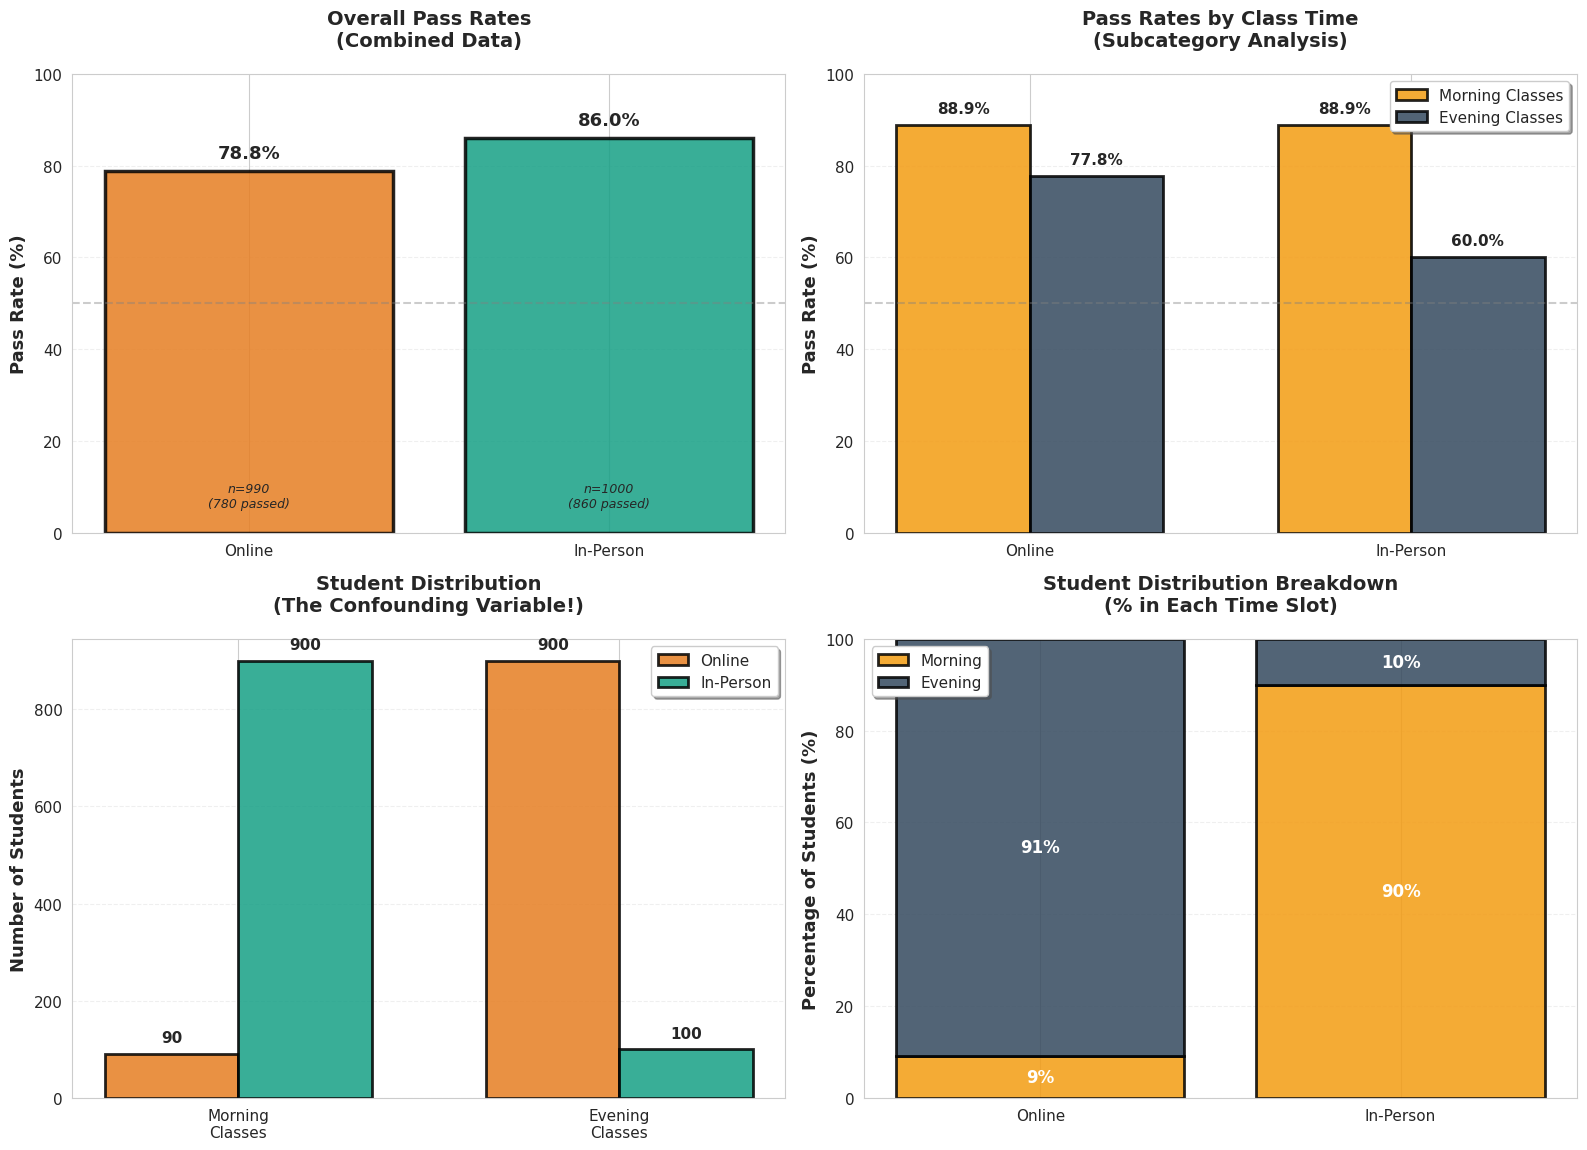


🎓 UNDERSTANDING THE VISUALIZATION:

1️⃣  Top Left: Shows the OVERALL comparison (can be misleading!)
2️⃣  Top Right: Shows the TRUE comparison within each category
3️⃣  Bottom Left: Reveals the DISTRIBUTION that causes the paradox
4️⃣  Bottom Right: Shows WHERE students are concentrated (the key!)

💡 The paradox occurs when:
   • One method handles mostly 'easy' cases (morning/high-performing)
   • The other handles mostly 'hard' cases (evening/low-performing)
   • This imbalance reverses the overall trend!


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Color scheme
method_colors = {'Online': '#e67e22', 'In-Person': '#16a085'}
time_colors = {'Morning': '#f39c12', 'Evening': '#34495e'}

# Extract data
morning_online = custom_data['morning_online']
morning_inperson = custom_data['morning_inperson']
evening_online = custom_data['evening_online']
evening_inperson = custom_data['evening_inperson']
overall_online = custom_data['overall_online']
overall_inperson = custom_data['overall_inperson']

# Chart 1: Overall Pass Rates
ax1 = axes[0, 0]
methods = ['Online', 'In-Person']
overall_rates = [overall_online[2], overall_inperson[2]]

bars1 = ax1.bar(methods, overall_rates,
                color=[method_colors[m] for m in methods],
                alpha=0.85, edgecolor='black', linewidth=2.5)

ax1.set_ylabel('Pass Rate (%)', fontsize=13, fontweight='bold')
ax1.set_title('Overall Pass Rates\n(Combined Data)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylim(0, 100)
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.4, linewidth=1.5)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for bar, rate in zip(bars1, overall_rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{rate:.1f}%', ha='center', va='bottom',
             fontsize=13, fontweight='bold')

    # Add student counts
    count = overall_online[0] if bar.get_x() < 0.5 else overall_inperson[0]
    passed = overall_online[1] if bar.get_x() < 0.5 else overall_inperson[1]
    ax1.text(bar.get_x() + bar.get_width()/2., 5,
             f'n={int(count)}\n({int(passed)} passed)',
             ha='center', va='bottom',
             fontsize=9, style='italic')

# Chart 2: Pass Rates by Class Time
ax2 = axes[0, 1]
x = np.arange(2)
width = 0.35

morning_rates = [morning_online[2], morning_inperson[2]]
evening_rates = [evening_online[2], evening_inperson[2]]

bars2_1 = ax2.bar(x - width/2, morning_rates, width,
                   label='Morning Classes', color=time_colors['Morning'],
                   alpha=0.85, edgecolor='black', linewidth=2)
bars2_2 = ax2.bar(x + width/2, evening_rates, width,
                   label='Evening Classes', color=time_colors['Evening'],
                   alpha=0.85, edgecolor='black', linewidth=2)

ax2.set_ylabel('Pass Rate (%)', fontsize=13, fontweight='bold')
ax2.set_title('Pass Rates by Class Time\n(Subcategory Analysis)',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(methods)
ax2.legend(frameon=True, shadow=True, fontsize=11, loc='best')
ax2.set_ylim(0, 100)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.4, linewidth=1.5)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bars in [bars2_1, bars2_2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{height:.1f}%', ha='center', va='bottom',
                 fontsize=11, fontweight='bold')

# Chart 3: Student Distribution
ax3 = axes[1, 0]
online_dist = [morning_online[0], evening_online[0]]
inperson_dist = [morning_inperson[0], evening_inperson[0]]

bars3_1 = ax3.bar(x - width/2, online_dist, width,
                   label='Online', color=method_colors['Online'],
                   alpha=0.85, edgecolor='black', linewidth=2)
bars3_2 = ax3.bar(x + width/2, inperson_dist, width,
                   label='In-Person', color=method_colors['In-Person'],
                   alpha=0.85, edgecolor='black', linewidth=2)

ax3.set_ylabel('Number of Students', fontsize=13, fontweight='bold')
ax3.set_title('Student Distribution\n(The Confounding Variable!)',
              fontsize=14, fontweight='bold', pad=20)
ax3.set_xticks(x)
ax3.set_xticklabels(['Morning\nClasses', 'Evening\nClasses'])
ax3.legend(frameon=True, shadow=True, fontsize=11)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

for bars in [bars3_1, bars3_2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax3.text(bar.get_x() + bar.get_width()/2., height + max(online_dist + inperson_dist) * 0.02,
                     f'{int(height)}', ha='center', va='bottom',
                     fontsize=11, fontweight='bold')

# Chart 4: Stacked Percentage View
ax4 = axes[1, 1]
online_pcts = [
    morning_online[0] / (morning_online[0] + evening_online[0]) * 100 if (morning_online[0] + evening_online[0]) > 0 else 0,
    evening_online[0] / (morning_online[0] + evening_online[0]) * 100 if (morning_online[0] + evening_online[0]) > 0 else 0
]
inperson_pcts = [
    morning_inperson[0] / (morning_inperson[0] + evening_inperson[0]) * 100 if (morning_inperson[0] + evening_inperson[0]) > 0 else 0,
    evening_inperson[0] / (morning_inperson[0] + evening_inperson[0]) * 100 if (morning_inperson[0] + evening_inperson[0]) > 0 else 0
]

methods_list = ['Online', 'In-Person']
p1 = ax4.bar(methods_list, [online_pcts[0], inperson_pcts[0]],
             color=time_colors['Morning'], alpha=0.85,
             edgecolor='black', linewidth=2, label='Morning')
p2 = ax4.bar(methods_list, [online_pcts[1], inperson_pcts[1]],
             bottom=[online_pcts[0], inperson_pcts[0]],
             color=time_colors['Evening'], alpha=0.85,
             edgecolor='black', linewidth=2, label='Evening')

ax4.set_ylabel('Percentage of Students (%)', fontsize=13, fontweight='bold')
ax4.set_title('Student Distribution Breakdown\n(% in Each Time Slot)',
              fontsize=14, fontweight='bold', pad=20)
ax4.legend(frameon=True, shadow=True, fontsize=11)
ax4.set_ylim(0, 100)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

# Add percentage labels
for i, method in enumerate(methods_list):
    if online_pcts[0] if i == 0 else inperson_pcts[0] > 5:
        ax4.text(i, (online_pcts[0] if i == 0 else inperson_pcts[0])/2,
                 f'{(online_pcts[0] if i == 0 else inperson_pcts[0]):.0f}%',
                 ha='center', va='center', fontsize=12,
                 fontweight='bold', color='white')
    if online_pcts[1] if i == 0 else inperson_pcts[1] > 5:
        bottom_val = online_pcts[0] if i == 0 else inperson_pcts[0]
        top_val = online_pcts[1] if i == 0 else inperson_pcts[1]
        ax4.text(i, bottom_val + top_val/2,
                 f'{top_val:.0f}%',
                 ha='center', va='center', fontsize=12,
                 fontweight='bold', color='white')

# Add paradox annotation if present
if custom_data['paradox']:
    fig.text(0.5, 0.02,
             '⚠️  SIMPSON\'S PARADOX DETECTED: One method wins in both categories but loses overall!',
             ha='center', fontsize=13, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7, edgecolor='red', linewidth=2))

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig('custom_simpsons_paradox.png', dpi=300, bbox_inches='tight')
print("\n📊 Custom visualization created successfully!")
print("💾 Saved as 'custom_simpsons_paradox.png'")
plt.show()

print("\n" + "="*70)
print("🎓 UNDERSTANDING THE VISUALIZATION:")
print("="*70)
print("\n1️⃣  Top Left: Shows the OVERALL comparison (can be misleading!)")
print("2️⃣  Top Right: Shows the TRUE comparison within each category")
print("3️⃣  Bottom Left: Reveals the DISTRIBUTION that causes the paradox")
print("4️⃣  Bottom Right: Shows WHERE students are concentrated (the key!)")
print("\n💡 The paradox occurs when:")
print("   • One method handles mostly 'easy' cases (morning/high-performing)")
print("   • The other handles mostly 'hard' cases (evening/low-performing)")
print("   • This imbalance reverses the overall trend!")
print("="*70)

# 📌 Summary, Key Takeaways, and Practice Exercises

---

## 🎓 SIMPSON'S PARADOX: COMPLETE SUMMARY 🎓

---

### 🤔 What is Simpson's Paradox?
Simpson's Paradox occurs when a trend appears in different groups of data but disappears or reverses when the groups are combined.  

⚡ **Key Characteristics**  
- A relationship that holds for multiple subgroups reverses when data is aggregated  
- What seems true overall is actually false within each subgroup (or vice versa)  

---

### 🌍 Real-World Examples We Explored

**1️⃣  Medical Treatments (Kidney Stones):**  
- Treatment B had better overall success rate  
- But Treatment A was better for BOTH small and large stones!  
- Why? Treatment A handled mostly easy cases (small stones)  

**2️⃣  University Admissions:**  
- One gender might have lower overall admission rate  
- But higher admission rate in EVERY individual department!  
- Why? They applied more to competitive departments  

**3️⃣  Teaching Methods:**  
- One method might seem better overall  
- But the other is better in both morning AND evening classes!  
- Why? Unequal distribution of students across time slots  

---

### ❗ Why This Matters

⚠️ **Data-Driven Decisions**  
- Businesses might choose wrong strategies based on aggregate data  
- Healthcare decisions could be misguided  
- Policy makers might implement ineffective policies  

🎯 **In Your Career**  
- Data Scientists → must always check for confounding variables  
- Managers → don’t rely solely on high-level metrics  
- Researchers → always analyze subgroups before concluding  

💡 **The Big Lesson**  
👉 **Aggregate data can lie. Always drill down into subgroups!**

---

### 🔍 How to Detect Simpson’s Paradox

✅ **Checklist**  
1. Calculate rates/averages for the **overall dataset**  
2. Identify potential confounding variables (grouping factors)  
3. Calculate rates/averages for **each subgroup** separately  
4. Compare the trends:  
   - If they’re opposite → you’ve found Simpson’s Paradox!  
   - If one group wins in all subgroups but loses overall → PARADOX  
5. Examine the **distribution**:  
   - Look at how samples are distributed across subgroups  
   - Unequal distributions often cause the paradox  

---

### 🛡️ How to Avoid Being Misled

🛡️ **Best Practices**  
- Always segment your data by relevant factors  
- Don’t trust a single aggregate statistic  
- Ask: “What subgroups might have different patterns?”  
- Consider confounding variables (age, location, difficulty, etc.)  
- When presenting data, show both aggregate **and** subgroup analysis  
- Be suspicious when sample sizes vary dramatically across groups  

📊 **Statistical Solutions**  
- Use stratified analysis  
- Control for confounding variables  
- Report both crude and adjusted rates  
- Use regression models that account for confounders  

---

### 💪 Try This Yourself!

🧪 **Exercise Ideas**  
1. **Baseball Batting Averages**: Player A has better average in both halves of the season, but Player B has better overall average.  
2. **Customer Satisfaction**: Product A rated higher in both age groups, but Product B rated higher overall.  
3. **Employee Performance**: Employee X has better metrics in both departments, but Employee Y has better overall metrics.  

💡 **Hint**  
Create unequal distributions across categories!  
- Put most of Group A in the “easy” category  
- Put most of Group B in the “hard” category  
- Give Group A better rates in both!  

---

### 🎯 Practice Challenge

Try to create your own Simpson’s Paradox with these numbers:  

**Scenario: Two sales teams across two product types**  

**High-Margin Products (harder to sell):**  
- Team A: ___ sales out of ___ attempts = ___% success  
- Team B: ___ sales out of ___ attempts = ___% success  

**Low-Margin Products (easier to sell):**  
- Team A: ___ sales out of ___ attempts = ___% success  
- Team B: ___ sales out of ___ attempts = ___% success  

**Goal:**  
Make **Team B win overall**, but **Team A win in both categories!**

🔑 **Hint**  
- Give Team A mostly low-margin (easy) products  
- Give Team B mostly high-margin (hard) products  
- Make Team A better at both types individually  

---

### 🌟 ✨ Remember ✨ 🌟  
Statistics don’t lie, but they **can be misleading!**  
Always look beneath the aggregate numbers.  

